# TASK 6.4.
# Table of Contents
## 1. Import libraries and dataset
## 2. Data cleaning, wrangling and consistency checks
### 2.1. Missing values
### 2.2. Duplicated values
### 2.3. Extreme values
## 3. Visual data exploration
### 3.1. Scatterplots
### 3.2. Hypothesis
## 4. Regression analysis 
### 4.1. Data preparation
### 4.2. Creating a regression analysis
### 4.3. Results interpretation
### 4.4. Model performance statistics—MSE and R2 score
### 4.5. Predicted y values with the actual y values in a dataframe comparison
### 4.5. Thoughts on how well the model performed on the test set

---

## 1. Import libraries and dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Create path
path = '/Users/mariliamachado/Documents/CareerFoundry/Data Immersion/Achievement 6'

In [11]:
# Import dataset
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Berlin_crimes_clean.csv'))

## 2. Data cleaning, wrangling and consistency checks

In [13]:
df.head()

,Unnamed: 0,Year,District,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior
0,0,2012,Mitte,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,1,2012,Mitte,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2,2012,Mitte,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,3,2012,Mitte,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,4,2012,Mitte,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [21]:
# Drop Unnamed column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Year,District,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior
0,2012,Mitte,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [42]:
df.describe()

,Year,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000
mean,2015.500000,34.233333,18.744167,276.334167,68.750000,92.583333,1492.307500,42.505833,215.275000,197.706667,69.489167,15.990833,6.281667,281.58250,62.884167,97.859167,662.415833
std,2.292243,37.093447,22.171153,243.697780,71.113959,68.455264,1364.442501,28.710164,150.031343,178.704771,57.866415,12.681934,5.186014,203.01033,62.292705,174.802343,534.787220
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,10.000000
25%,2013.750000,10.000000,5.000000,108.000000,22.000000,42.000000,639.750000,22.000000,109.000000,76.000000,28.000000,7.000000,3.000000,133.00000,20.000000,18.000000,269.250000
50%,2015.500000,22.000000,11.000000,204.500000,44.000000,75.000000,1100.000000,37.000000,186.000000,143.000000,59.000000,13.000000,5.000000,244.00000,45.000000,40.000000,553.500000
75%,2017.250000,42.000000,23.000000,361.000000,86.000000,124.000000,2019.750000,57.000000,291.000000,286.000000,96.000000,22.000000,9.000000,382.00000,87.000000,86.000000,870.250000
max,2019.000000,242.000000,169.000000,1966.000000,500.000000,420.000000,12479.000000,197.000000,876.000000,1288.000000,446.000000,74.000000,31.000000,1538.00000,530.000000,1949.000000,3813.000000


### 2.1. Missing values

In [17]:
# Check for missing values

df.isnull().sum()

Unnamed: 0             0
Year                   0
District               0
Location               0
Robbery                0
Street_robbery         0
Injury                 0
Agg_assault            0
Threat                 0
Theft                  0
Car_theft              0
Car_burglary           0
Bike_theft             0
Burglary               0
Fire                   0
Arson                  0
Damage                 0
Graffiti               0
Drugs_possession       0
Antisocial_behavior    0
dtype: int64

### 2.2. Duplicated values

In [25]:
# Check duplicated values
dups = df.duplicated()
dups.shape

(1200,)

### 2.3. Extreme values

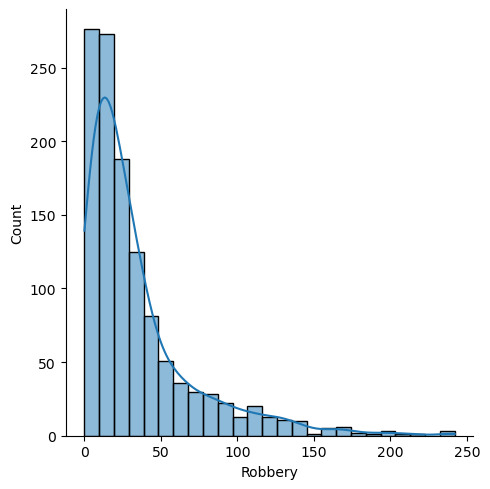

In [171]:
# Check extreme values - Robbery
sns.displot(df['Robbery'], bins=25, kde = True) 

plt.show()

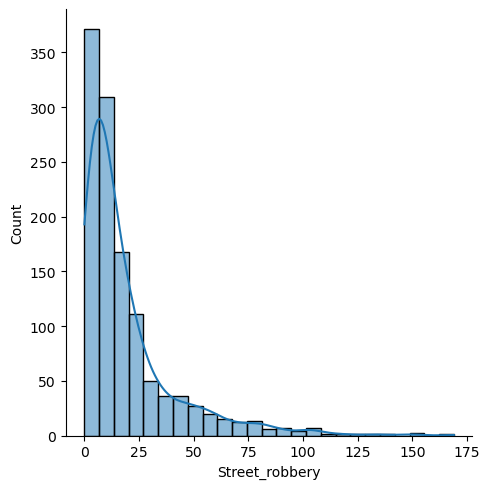

In [169]:
# Check extreme values - Street_robbery
sns.displot(df['Street_robbery'], bins=25, kde = True) 

plt.show()

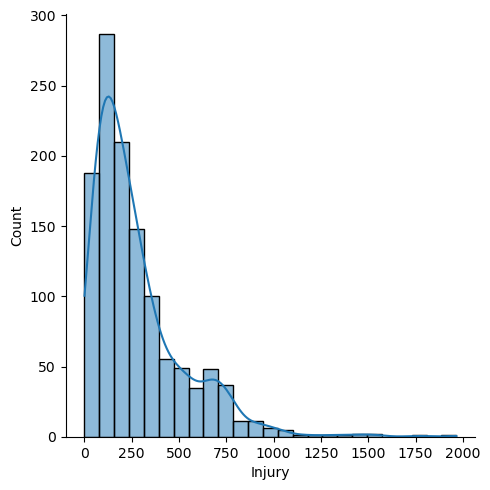

In [167]:
# Check extreme values - Injury
sns.displot(df['Injury'], bins=25, kde = True) 

plt.show()

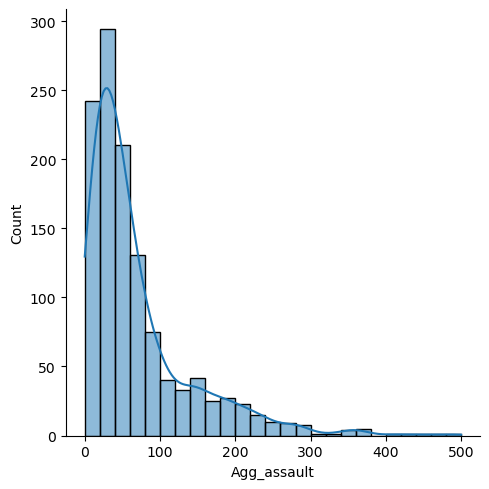

In [165]:
# Check extreme values - Agg_assault
sns.displot(df['Agg_assault'], bins=25, kde = True) 

plt.show()

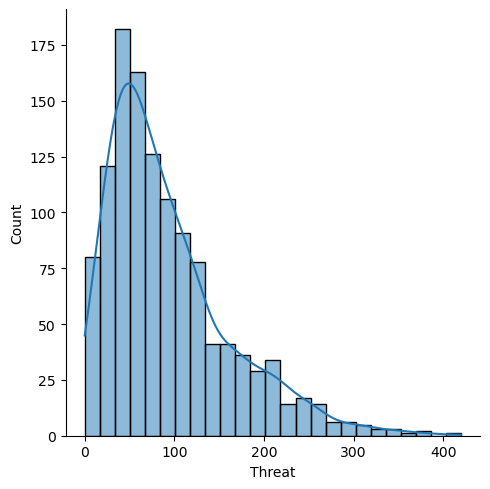

In [163]:
# Check extreme values - Threat
sns.displot(df['Threat'], bins=25, kde = True) 

plt.show()

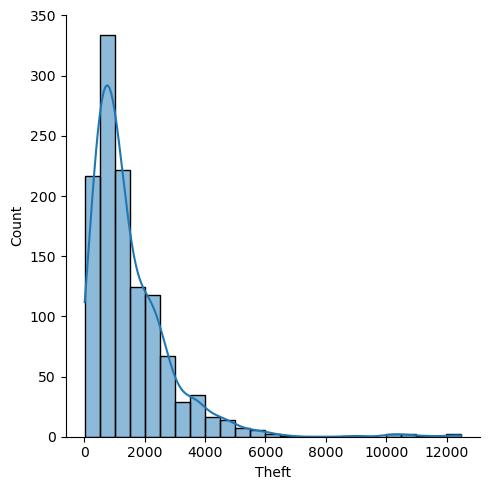

In [161]:
# Check extreme values - Theft
sns.displot(df['Theft'], bins=25, kde = True) 

plt.show()

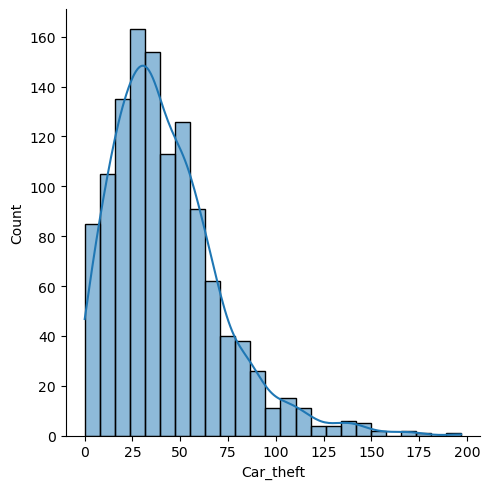

In [159]:
# Check extreme values - Car_theft
sns.displot(df['Car_theft'], bins=25, kde = True) 

plt.show()

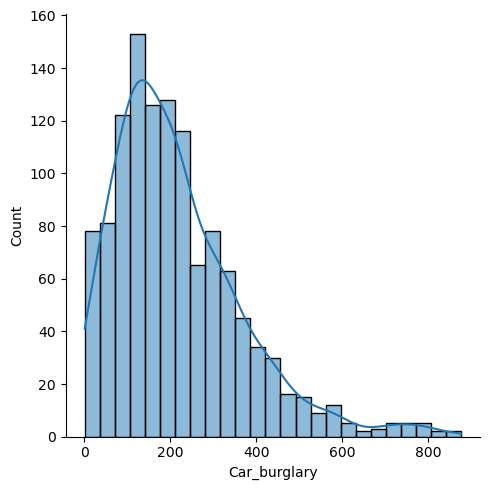

In [157]:
# Check extreme values - Car_burglary
sns.displot(df['Car_burglary'], bins=25, kde = True) 

plt.show()

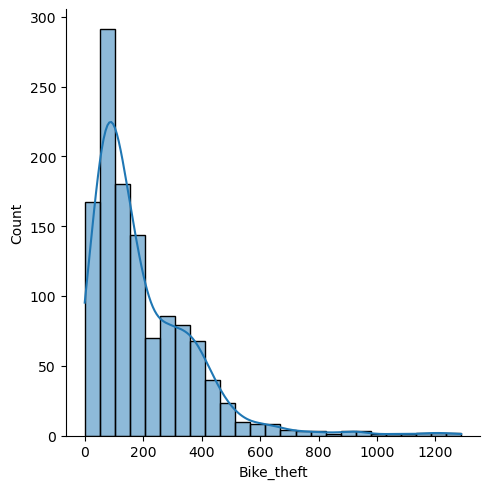

In [155]:
# Check extreme values - Bike_theft
sns.displot(df['Bike_theft'], bins=25, kde = True) 

plt.show()

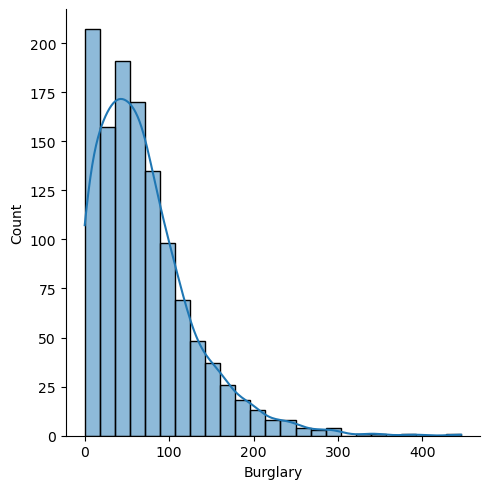

In [153]:
# Check extreme values - Burglary
sns.displot(df['Burglary'], bins=25, kde = True) 

plt.show()

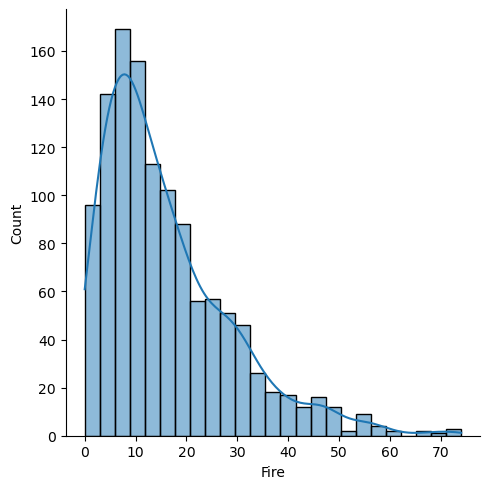

In [151]:
# Check extreme values - Fire
sns.displot(df['Fire'], bins=25, kde = True) 

plt.show()

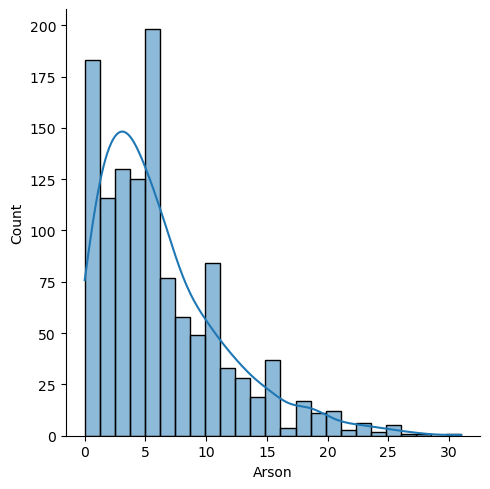

In [149]:
# Check extreme values - Arson
sns.displot(df['Arson'], bins=25, kde = True) 

plt.show()

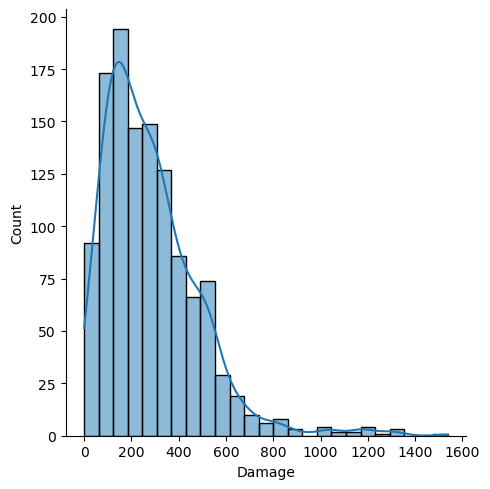

In [147]:
# Check extreme values - Damage
sns.displot(df['Damage'], bins=25, kde = True) 

plt.show()

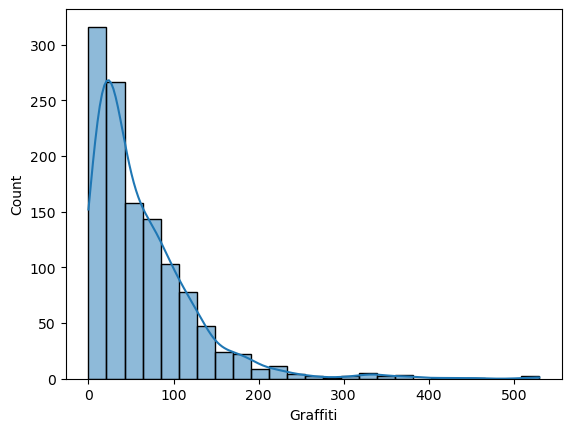

In [145]:
# Check extreme values - Graffiti
sns.histplot(df['Graffiti'], bins=25, kde = True) 

plt.show()

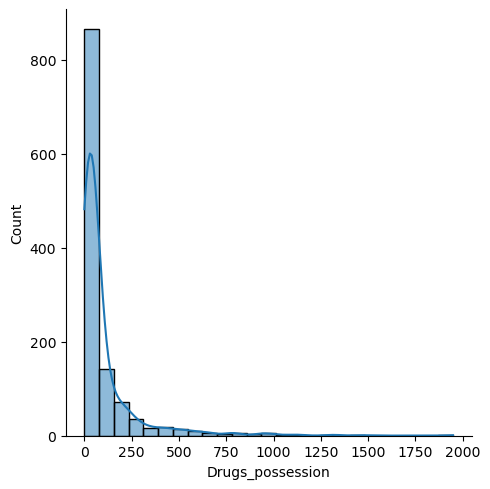

In [173]:
# Check extreme values - Drugs_possession
sns.displot(df['Drugs_possession'], bins=25, kde = True) 

plt.show()

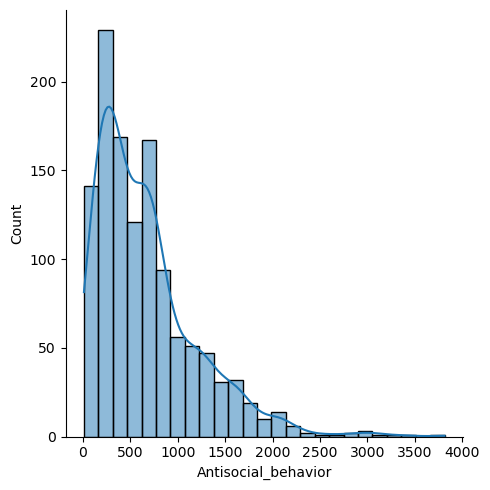

In [175]:
# Check extreme values - Antisocial_behavior
sns.displot(df['Antisocial_behavior'], bins=25, kde = True) 

plt.show()

There are a few outliers in a few variables, but I will let them be for now

## 3. Visual data exploration
### 3.1. Scatterplots

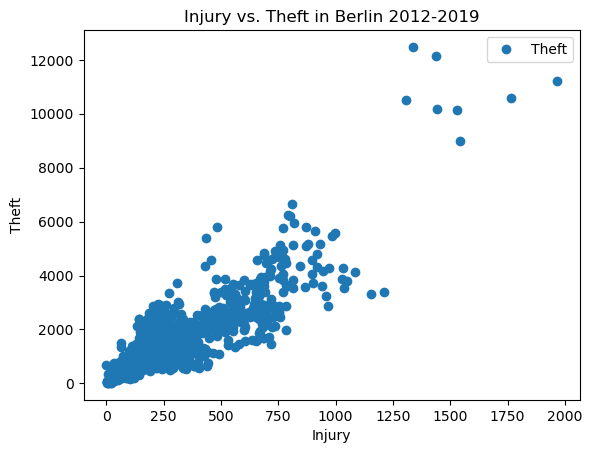

In [128]:
# Create a scatterplot plotting theft against injury

df.plot(x = 'Injury', y='Theft',style='o') 
plt.title('Injury vs. Theft in Berlin 2012-2019')  
plt.xlabel('Injury')  
plt.ylabel('Theft')  
plt.show()

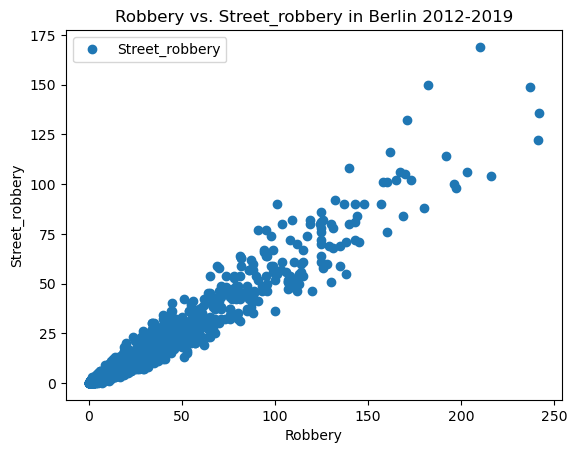

In [189]:
# Create a scatterplot plotting robbery against street_robbery

df.plot(x = 'Robbery', y='Street_robbery',style='o') 
plt.title('Robbery vs. Street_robbery in Berlin 2012-2019')  
plt.xlabel('Robbery')  
plt.ylabel('Street_robbery')  
plt.show()

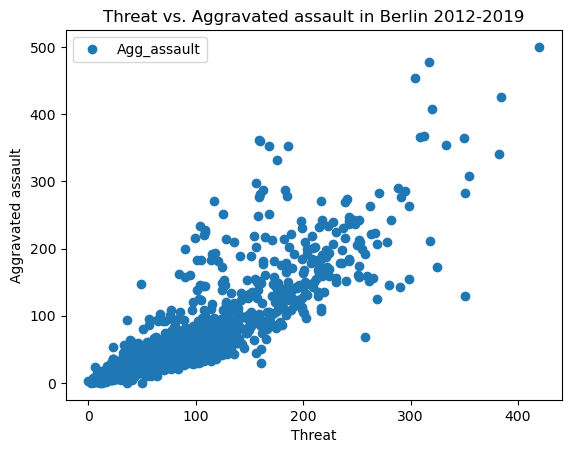

In [136]:
# Create a scatterplot plotting Threat against Aggravated assault

df.plot(x = 'Threat', y='Agg_assault',style='o') 
plt.title('Threat vs. Aggravated assault in Berlin 2012-2019')  
plt.xlabel('Threat')  
plt.ylabel('Aggravated assault')  
plt.show()

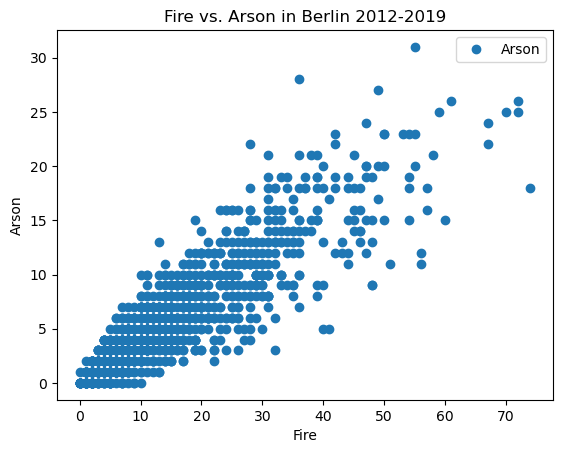

In [191]:
# Create a scatterplot plotting Fire against Arson

df.plot(x = 'Fire', y='Arson',style='o') 
plt.title('Fire vs. Arson in Berlin 2012-2019')  
plt.xlabel('Fire')  
plt.ylabel('Arson')  
plt.show()

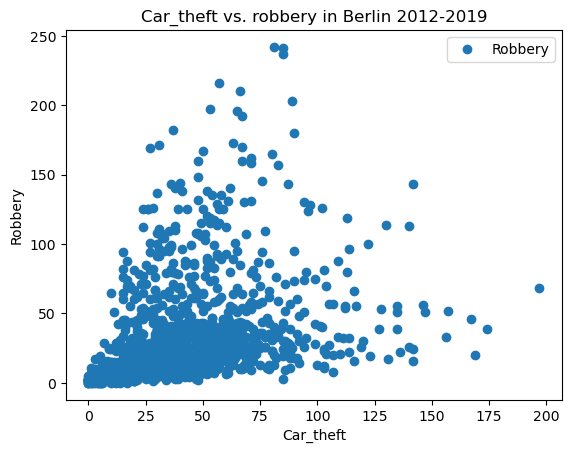

In [181]:
# Create a scatterplot plotting car theft against robbery

df.plot(x = 'Car_theft', y='Robbery',style='o') 
plt.title('Car_theft vs. robbery in Berlin 2012-2019')  
plt.xlabel('Car_theft')  
plt.ylabel('Robbery')  
plt.show()

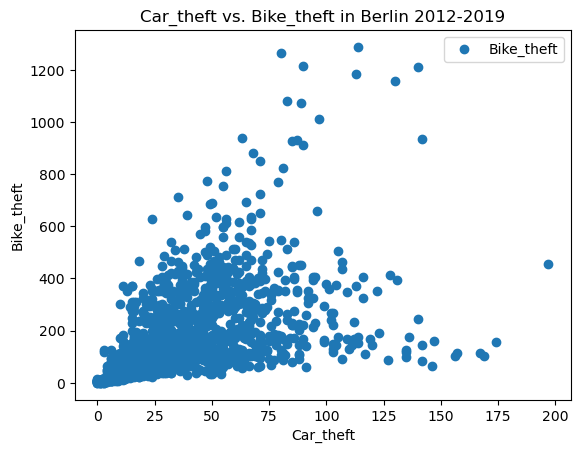

In [183]:
# Create a scatterplot plotting car theft against Bike_theft

df.plot(x = 'Car_theft', y='Bike_theft',style='o') 
plt.title('Car_theft vs. Bike_theft in Berlin 2012-2019')  
plt.xlabel('Car_theft')  
plt.ylabel('Bike_theft')  
plt.show()

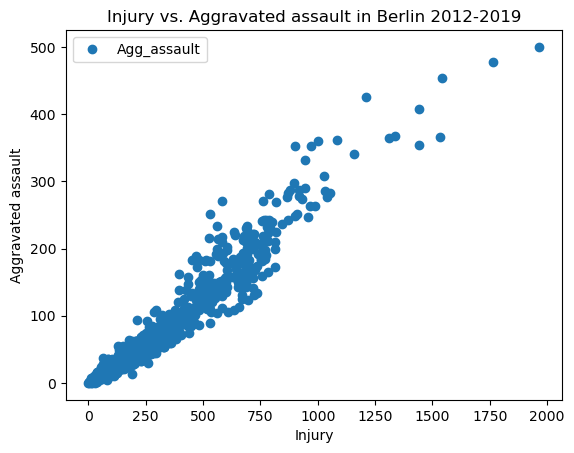

In [179]:
# Create a scatterplot plotting Injury against Aggravated assault

df.plot(x = 'Injury', y='Agg_assault',style='o') 
plt.title('Injury vs. Aggravated assault in Berlin 2012-2019')  
plt.xlabel('Injury')  
plt.ylabel('Aggravated assault')  
plt.show()

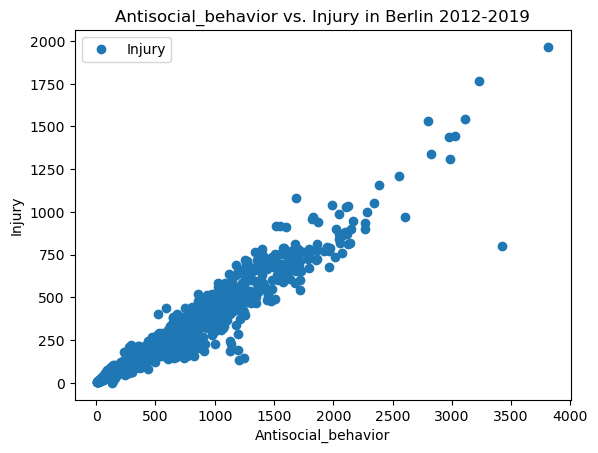

In [132]:
# Create a scatterplot plotting antisocial_behavior against injury

df.plot(x = 'Antisocial_behavior', y='Injury',style='o') 
plt.title('Antisocial_behavior vs. Injury in Berlin 2012-2019')  
plt.xlabel('Antisocial_behavior')  
plt.ylabel('Injury')  
plt.show()

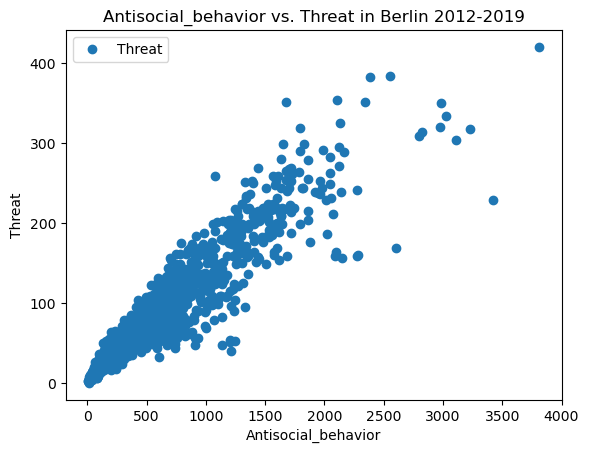

In [195]:
# Create a scatterplot plotting antisocial_behavior against threat

df.plot(x = 'Antisocial_behavior', y='Threat',style='o') 
plt.title('Antisocial_behavior vs. Threat in Berlin 2012-2019')  
plt.xlabel('Antisocial_behavior')  
plt.ylabel('Threat')  
plt.show()

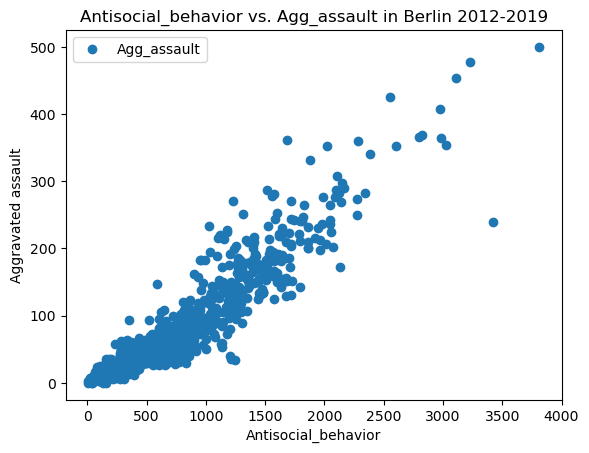

In [193]:
# Create a scatterplot plotting antisocial_behavior against aggravated assault

df.plot(x = 'Antisocial_behavior', y='Agg_assault',style='o') 
plt.title('Antisocial_behavior vs. Agg_assault in Berlin 2012-2019')  
plt.xlabel('Antisocial_behavior')  
plt.ylabel('Aggravated assault')  
plt.show()

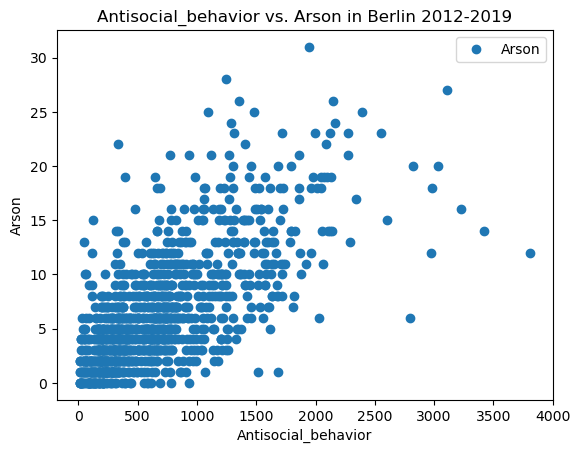

In [185]:
# Create a scatterplot plotting antisocial_behavior against arson

df.plot(x = 'Antisocial_behavior', y='Arson',style='o') 
plt.title('Antisocial_behavior vs. Arson in Berlin 2012-2019')  
plt.xlabel('Antisocial_behavior')  
plt.ylabel('Arson')  
plt.show()

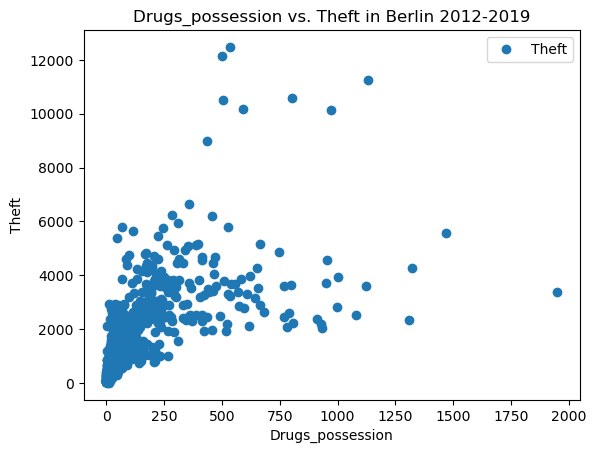

In [130]:
# Create a scatterplot plotting drugs_possession against theft

df.plot(x = 'Drugs_possession', y='Theft',style='o') 
plt.title('Drugs_possession vs. Theft in Berlin 2012-2019')  
plt.xlabel('Drugs_possession')  
plt.ylabel('Theft')  
plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


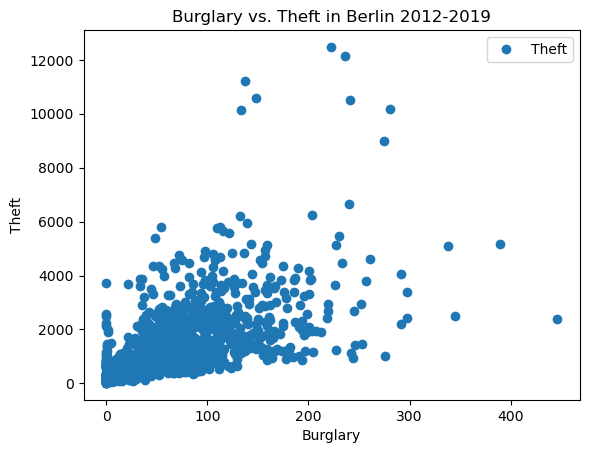

In [187]:
# Create a scatterplot plotting burglary against theft

df.plot(x = 'Burglary', y='Theft',style='o') 
plt.title('Burglary vs. Theft in Berlin 2012-2019')  
plt.xlabel('Burglary')  
plt.ylabel('Theft')  
plt.show()

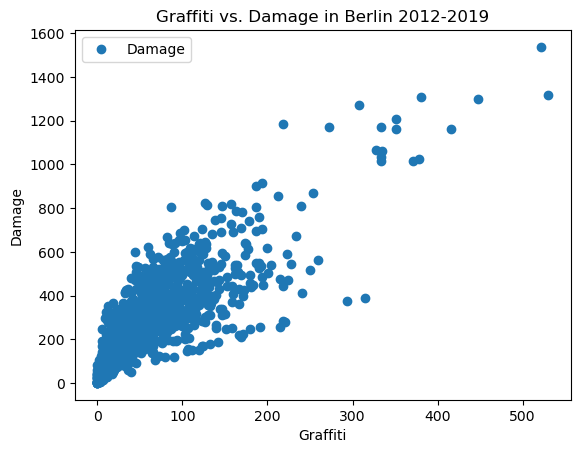

In [177]:
# Create a scatterplot plotting graffiti against damage

df.plot(x = 'Graffiti', y='Damage',style='o') 
plt.title('Graffiti vs. Damage in Berlin 2012-2019')  
plt.xlabel('Graffiti')  
plt.ylabel('Damage')  
plt.show()

### 3.2. Hypothesis
- If antisocial behavior crimes increase, injury crimes will also increase.  

**Other possibilities**
- If antisocial behavior crimes increase, threat crimes will also increase.
- If antisocial behavior crimes increase, aggravated assault crimes will also increase.
- If street robbery increases, robbery in general will increase.
- If injury crimes increase, aggravated assault will increase.


## 4. Regression analysis 
### 4.1. Data preparation

In [200]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Antisocial_behavior'].values.reshape(-1,1)
y = df['Injury'].values.reshape(-1,1)

In [202]:
X

array([[1032],
       [ 870],
       [3108],
       ...,
       [ 212],
       [ 218],
       [  21]])

In [204]:
y

array([[ 586],
       [ 474],
       [1541],
       ...,
       [  84],
       [  95],
       [  14]])

In [206]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.2. Creating a regression analysis

In [209]:
# Create a regression object.

regression = LinearRegression()  

In [211]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [213]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

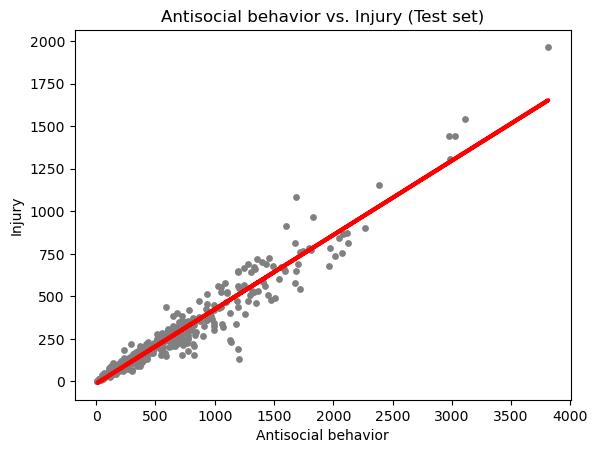

In [215]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Antisocial behavior vs. Injury (Test set)')
plot_test.xlabel('Antisocial behavior')
plot_test.ylabel('Injury')
plot_test.show()

### 4.3. Results interpretation
From my perspective, the line seems to fit the data quite nicely with very few outliers as the highest values.

### 4.4. Model performance statistics—MSE and R2 score

In [217]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [219]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43684075]]
Mean squared error:  5219.8181120799145
R2 score:  0.9252491240804056


### 4.5. Predicted y values with the actual y values in a dataframe comparison

In [230]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,72,103.206543
1,289,353.516291
2,1083,723.083562
3,80,33.312024
4,151,149.948503
5,200,229.016678
6,90,41.611998
7,440,508.157915
8,671,567.131416
9,1966,1652.680669


### 4.5. Thoughts on how well the model performed on the test set

Initially, I believed the model performed well based on the visualization. However, upon comparing the predicted and actual results, significant differences are evident. Given the distributions of the target and predictor variables (as shown in the histograms), it appears the model may not be acceptable.   
One possible issue could be data biases such as reporting bias and correlation-causation bias: there might be inconsistent reporting between the variables. For instance, "injury" may be reported more frequently or reliably than "antisocial behavior," or vice versa. This imbalance could skew the relationship the model learns. Furthermore, the model assumes a correlation between "antisocial behavior" and "injury" implies causation, but this might not be true. Instead, both variables could be influenced by external factors (e.g., population density, socioeconomic status, or seasonal trends). Alternatively, they might only exhibit a coincidental relationship rather than a causal one.